## Task
2. 每个tract有多少cases，heatmap by race
3. 得出什么是concentrate，分析多少个census tract？

In [1]:
# 读取文件
import pandas as pd
data = pd.read_csv("./dem+census.csv") 
data.head()

,CASE_ID,PERSON_ID,CLIENT_NAME,address_line1,address_line2,address_line3,CITY,state,ZIP,ATTORNEY_NAME,...,NAME,OBJECTID,TRACT,CENTLON,AREALAND,INTPTLON,MTFCC,COUNTY,CENT,INTPT
0,16,12,"OverBanks, K.",65 Monroe Street,NaN,NaN,Roxbury,MA,2119,"Williams, Bryna",...,Census Tract 817,58090.0,81700.0,-71.086034,633875.0,-71.086034,G5020,25.0,"(-71.0860337, 42.3226992)","(-71.0860337, 42.3226992)"
1,44,35,"Bazzinotti, D.",DYS - Brewster House soon,NaN,NaN,NaN,MA,NaN,"Hopkins, Ziyad",...,Census Tract 108,47901.0,10800.0,-70.103463,28389039.0,-70.100911,G5020,1.0,"(-70.1034625, 41.7425511)","(-70.1009106, 41.7434889)"
2,45,46,"Colorado, D.",123 Conference Lane,NaN,NaN,Boston,MA,2119,"Hopkins, Ziyad",...,Census Tract 606.04,85520.0,60604.0,-71.041442,416317.0,-71.038464,G5020,25.0,"(-71.0414415, 42.3525218)","(-71.0384635, 42.350768)"
3,46,46,"Colorado, D.",123 Conference Lane,NaN,NaN,Boston,MA,2119,"Williams, Bryna",...,Census Tract 606.04,85520.0,60604.0,-71.041442,416317.0,-71.038464,G5020,25.0,"(-71.0414415, 42.3525218)","(-71.0384635, 42.350768)"
4,49,70,"Jamison-Williams, T.",21 Westwind Road,NaN,NaN,Dorchester,MA,2125,"Bowden, Julie",...,Census Tract 909.01,46548.0,90901.0,-71.041158,1173210.0,-71.044563,G5020,25.0,"(-71.0411576, 42.3164857)","(-71.044563, 42.317172)"


In [4]:
def float2int(num):
    try:
        return int(num)
    except:
        return 0

In [5]:
data['GEOID'] = data.GEOID.apply(float2int)

In [7]:
data['GEOID'] = data.GEOID.apply(str)

In [11]:
data['GEOID'][0]

'25025081700'

In [ ]:
data.to_csv("./new_dem+census.csv")

In [2]:
tract = data.TRACT.apply(float2int)
tract[:5]

0    81700
1    10800
2    60604
3    60604
4    90901
Name: TRACT, dtype: int64

In [3]:
# 每个tract有多少cases
cases_per_tract = pd.value_counts(tract)
print(cases_per_tract)

0         715
732400    174
101102    152
352400    138
100500    128
         ... 
332100      1
51602       1
813403      1
709100      1
523203      1
Name: TRACT, Length: 1531, dtype: int64


In [4]:
cases_per_tract[:459]

0         715
732400    174
101102    152
352400    138
100500    128
         ... 
744300     17
511702     17
81302      17
530700     17
160300     17
Name: TRACT, Length: 459, dtype: int64

In [5]:
len(data)

25708

In [6]:
from statistics import mean

average = mean(cases_per_tract)

In [7]:
print(average)

16.791639451338995


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# sns.set_palette('deep', desat=.6)
# sns.set_context(rc={'figure.figsize': (8, 5) } )

/Users/zhangyuan/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TRACT', ylabel='Density'>

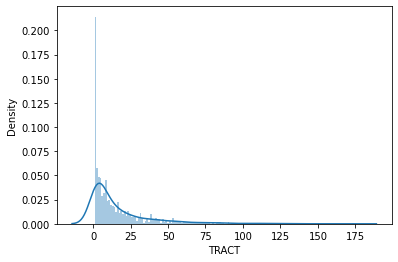

In [9]:
sns.distplot(cases_per_tract[1:],bins=150)

In [10]:
num_data = len(data) * 0.5
sum_data = 0
num_tract = 0
for i in cases_per_tract[1:]:
    sum_data += i
    num_tract += 1
    if sum_data > num_data:
        print(num_tract)
        break

# 563个tracts 可以包含80%的case
# 209个tracts 可以包含50%的case

209


In [43]:
num_tract = int(len(cases_per_tract) * 0.2)
sum_case = 0

for i in cases_per_tract[1:num_tract]:
    sum_case += i
    
print(sum_case/len(data))  # 前20%的tract 可以包含61%的case

0.6147502722887817


In [11]:
import geopandas as gpd

mass = gpd.read_file("./cb_2018_25_tract_500k/cb_2018_25_tract_500k.shp")
print(mass.columns)

Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'AFFGEOID', 'GEOID', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry'],
      dtype='object')


In [12]:
geoid = data.GEOID.apply(float2int)
geoid_numOfCases = data.value_counts(geoid).rename_axis('GEOID').to_frame('cases_per_geoid')
print(geoid_numOfCases)

             cases_per_geoid
GEOID                       
0                        715
25027732400              174
25025101102              152
25017352400              138
25025100500              128
...                      ...
23015975800                1
23015975200                1
23013970401                1
25017357200                1
72127001301                1

[1566 rows x 1 columns]


In [13]:
mass['GEOID'] = mass.GEOID.apply(int)
mass['GEOID'][:5]

0    25009202102
1    25009205100
2    25017339400
3    25017342101
4    25017351000
Name: GEOID, dtype: int64

In [14]:
mass = pd.merge(mass, geoid_numOfCases[1:], on='GEOID')
print(mass)

     STATEFP COUNTYFP TRACTCE              AFFGEOID        GEOID     NAME  \
0         25      009  205100  1400000US25009205100  25009205100     2051   
1         25      017  339400  1400000US25017339400  25017339400     3394   
2         25      017  342101  1400000US25017342101  25017342101  3421.01   
3         25      017  352700  1400000US25017352700  25017352700     3527   
4         25      009  206000  1400000US25009206000  25009206000     2060   
...      ...      ...     ...                   ...          ...      ...   
1139      25      013  801602  1400000US25013801602  25013801602  8016.02   
1140      25      005  615100  1400000US25005615100  25005615100     6151   
1141      25      005  641200  1400000US25005641200  25005641200     6412   
1142      25      005  642200  1400000US25005642200  25005642200     6422   
1143      25      009  203100  1400000US25009203100  25009203100     2031   

     LSAD     ALAND   AWATER  \
0      CT   1826284    92857   
1      CT  

In [15]:
print(mass.columns)

Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'AFFGEOID', 'GEOID', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry', 'cases_per_geoid'],
      dtype='object')


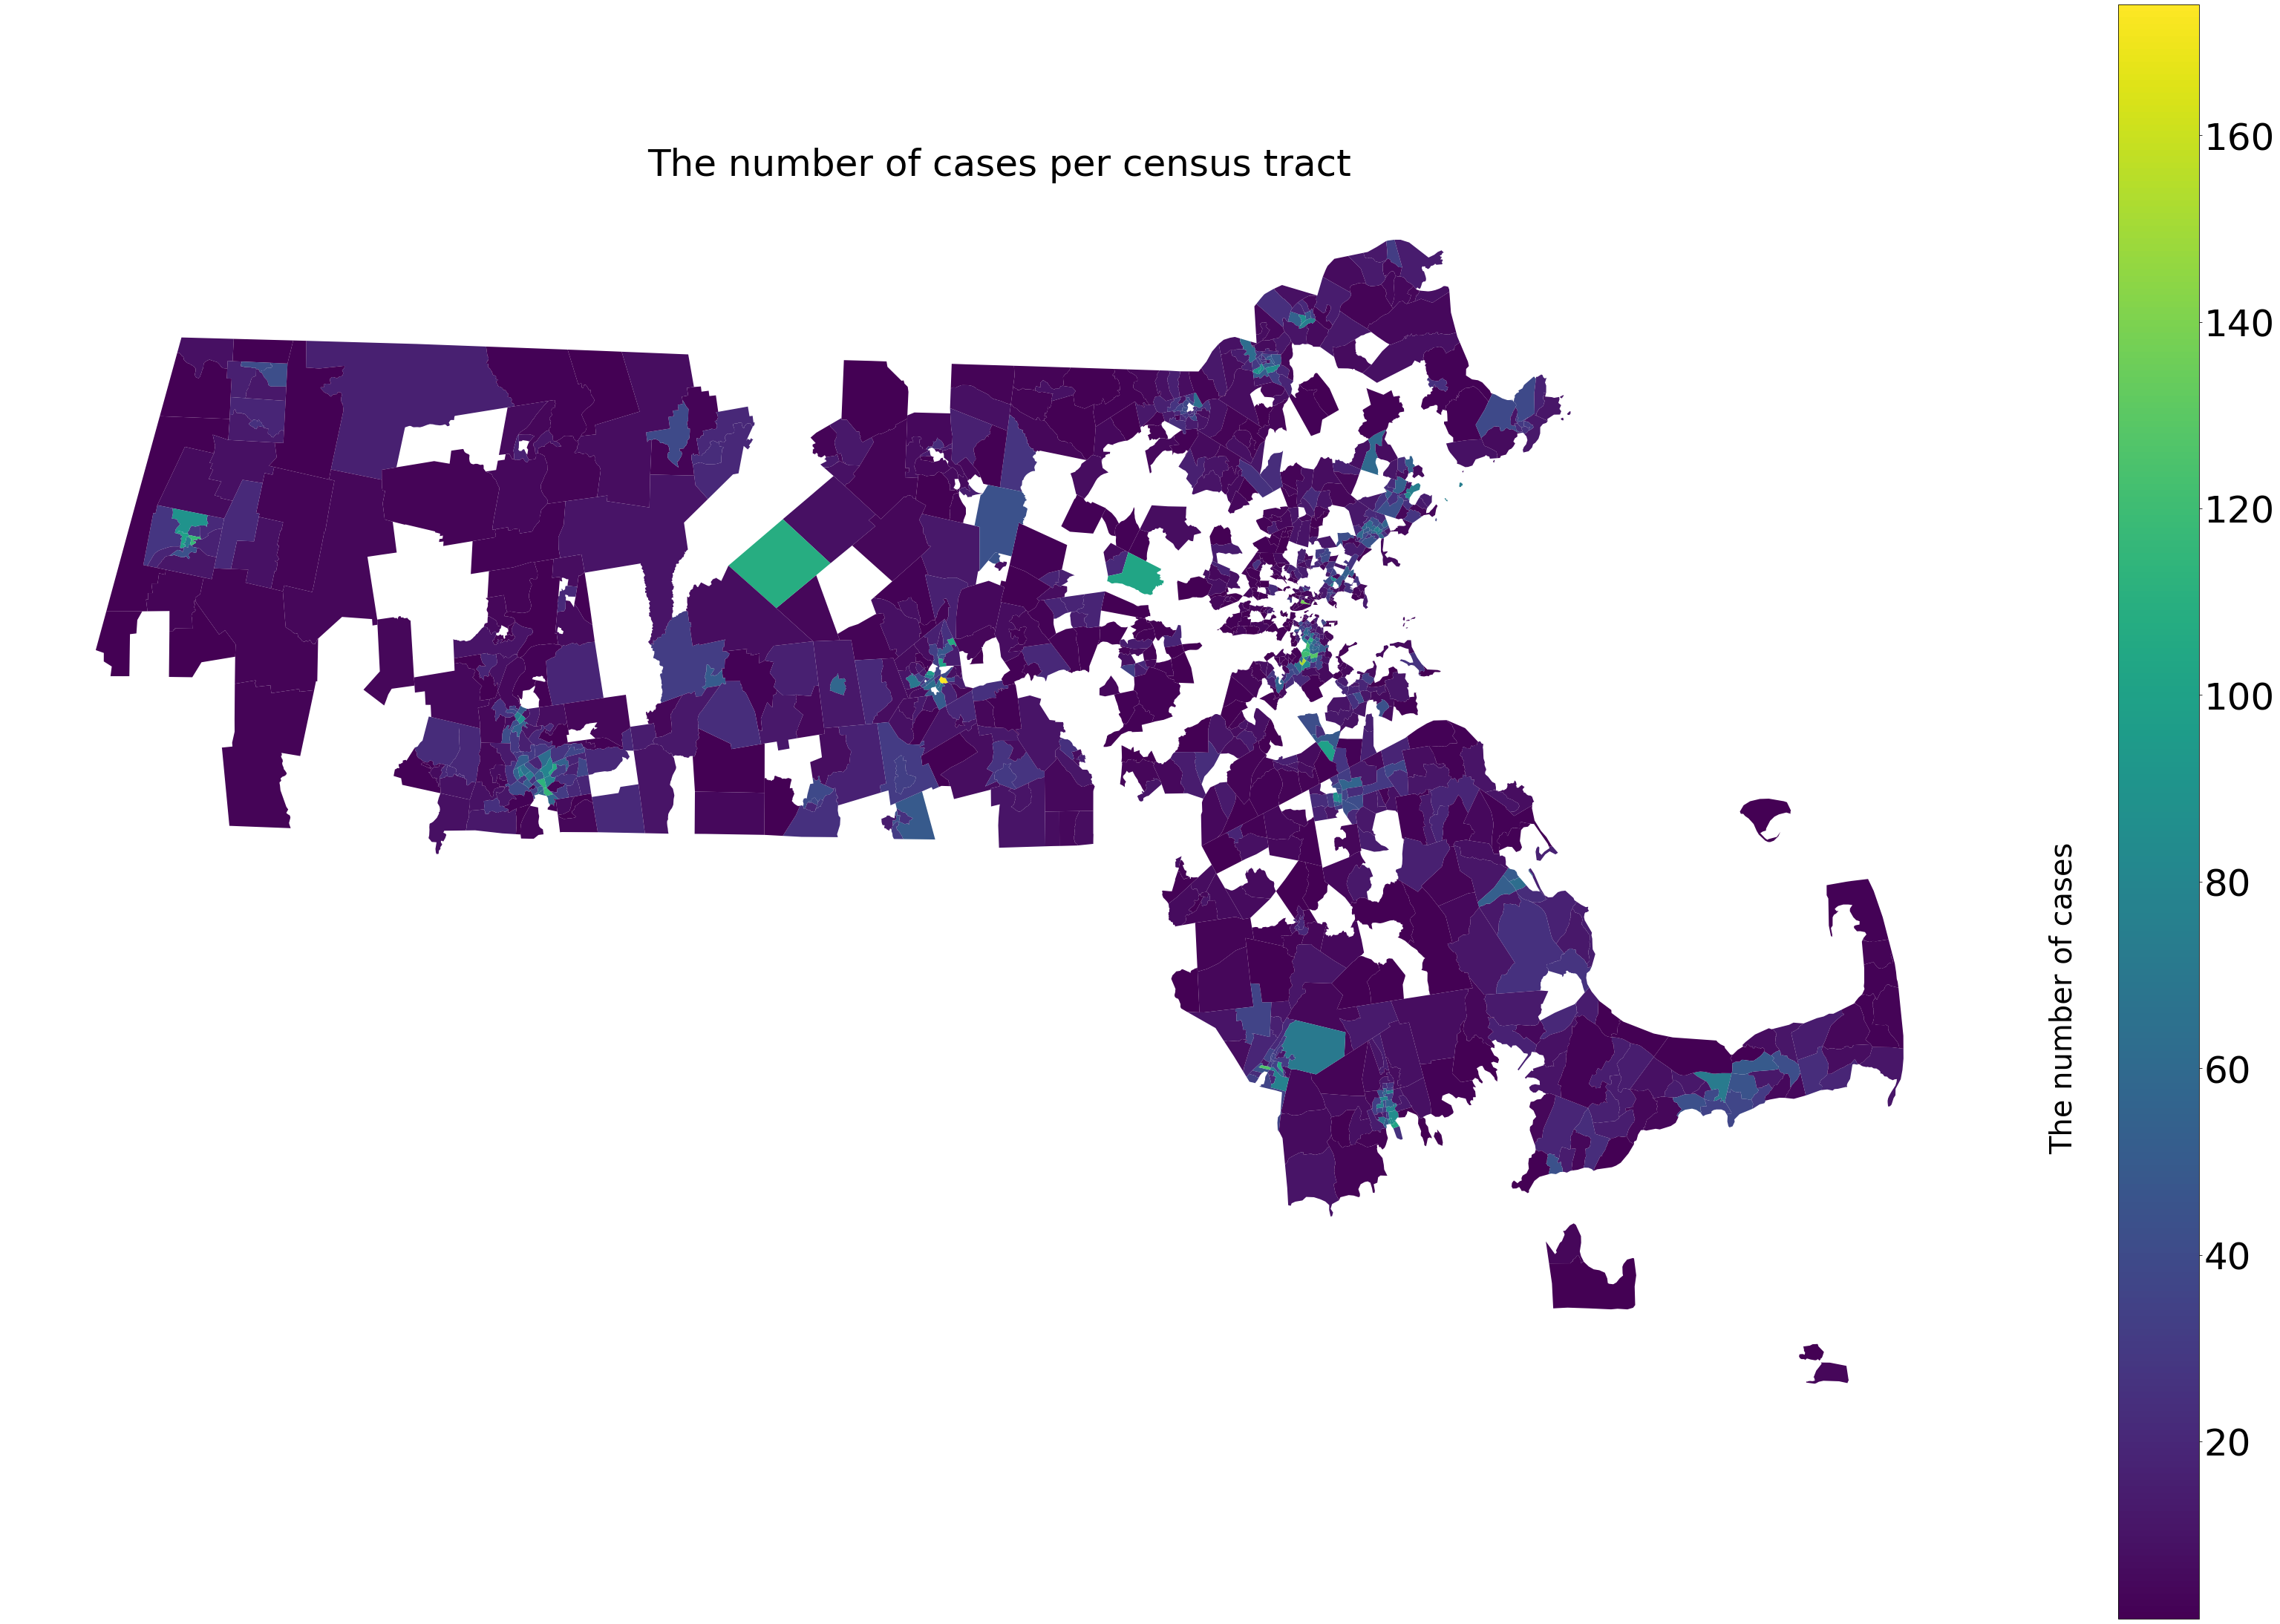

In [30]:
plt.rcParams['figure.figsize'] = [60, 40]
ax = mass.plot(column='cases_per_geoid', legend = True)
fig = ax.figure
color_bar = fig.axes[1]
color_bar.tick_params(labelsize=50)
#Bounds supplies information on the maximum and minimum values of the x-axis and y-axis of our plot.
bounds = mass.bounds.iloc[3]
minx = bounds["minx"]
miny = bounds["miny"]

# We use that information to place the text label for our legend
plt.text(minx + 1.5, miny - 0.8, 'The number of cases', fontsize=40, rotation=90, rotation_mode='anchor')
plt.title('The number of cases per census tract', fontsize = 50)
plt.axis('off')
plt.savefig('./cases_per_geoid.jpg')